In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [41]:
day = pd.read_csv('day.csv')

In [42]:
day.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [43]:
day.shape

(730, 16)

In [44]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [45]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Visualizing data to understand data and to get more insights

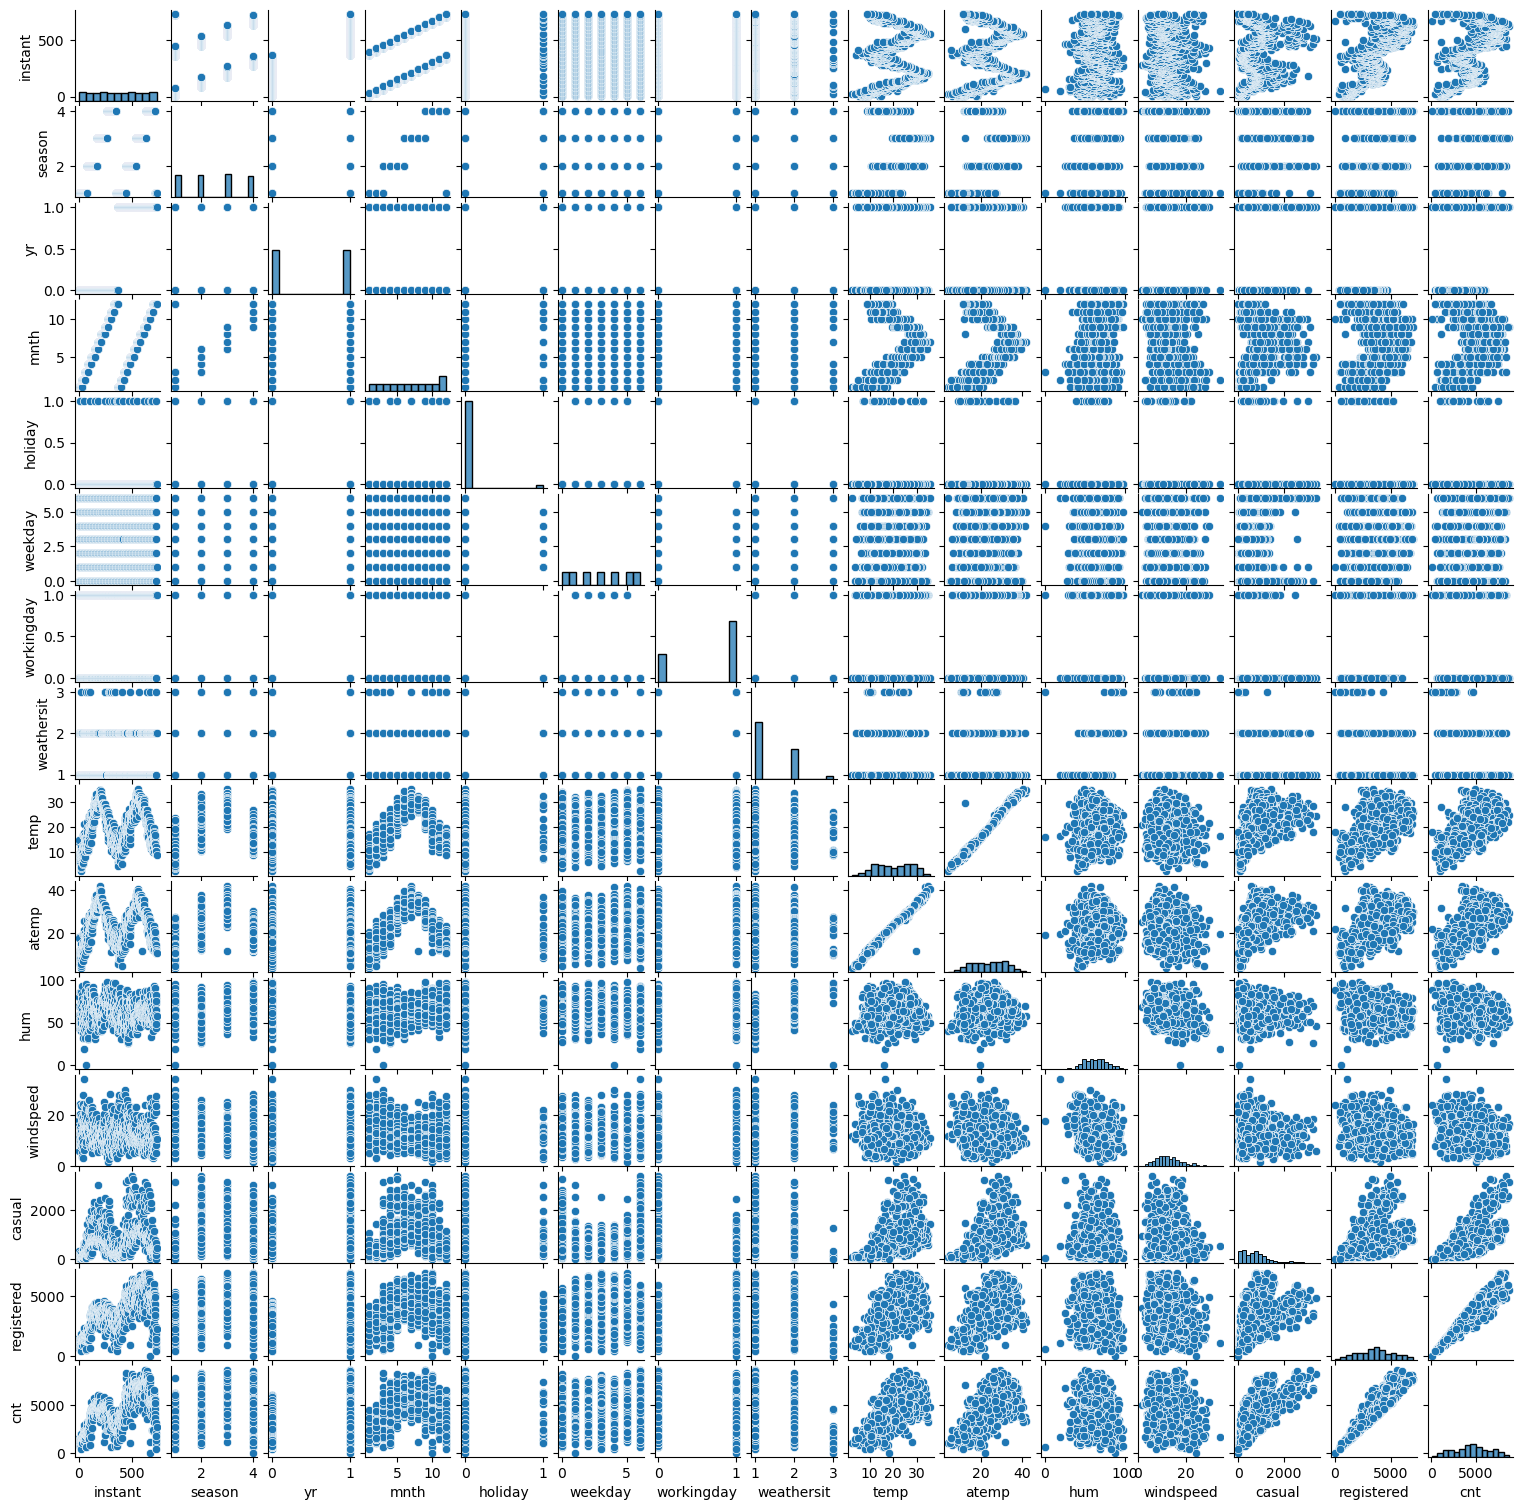

In [46]:
p = sns.pairplot(day)
p.fig.set_figheight(15)
p.fig.set_figwidth(15)
plt.show()

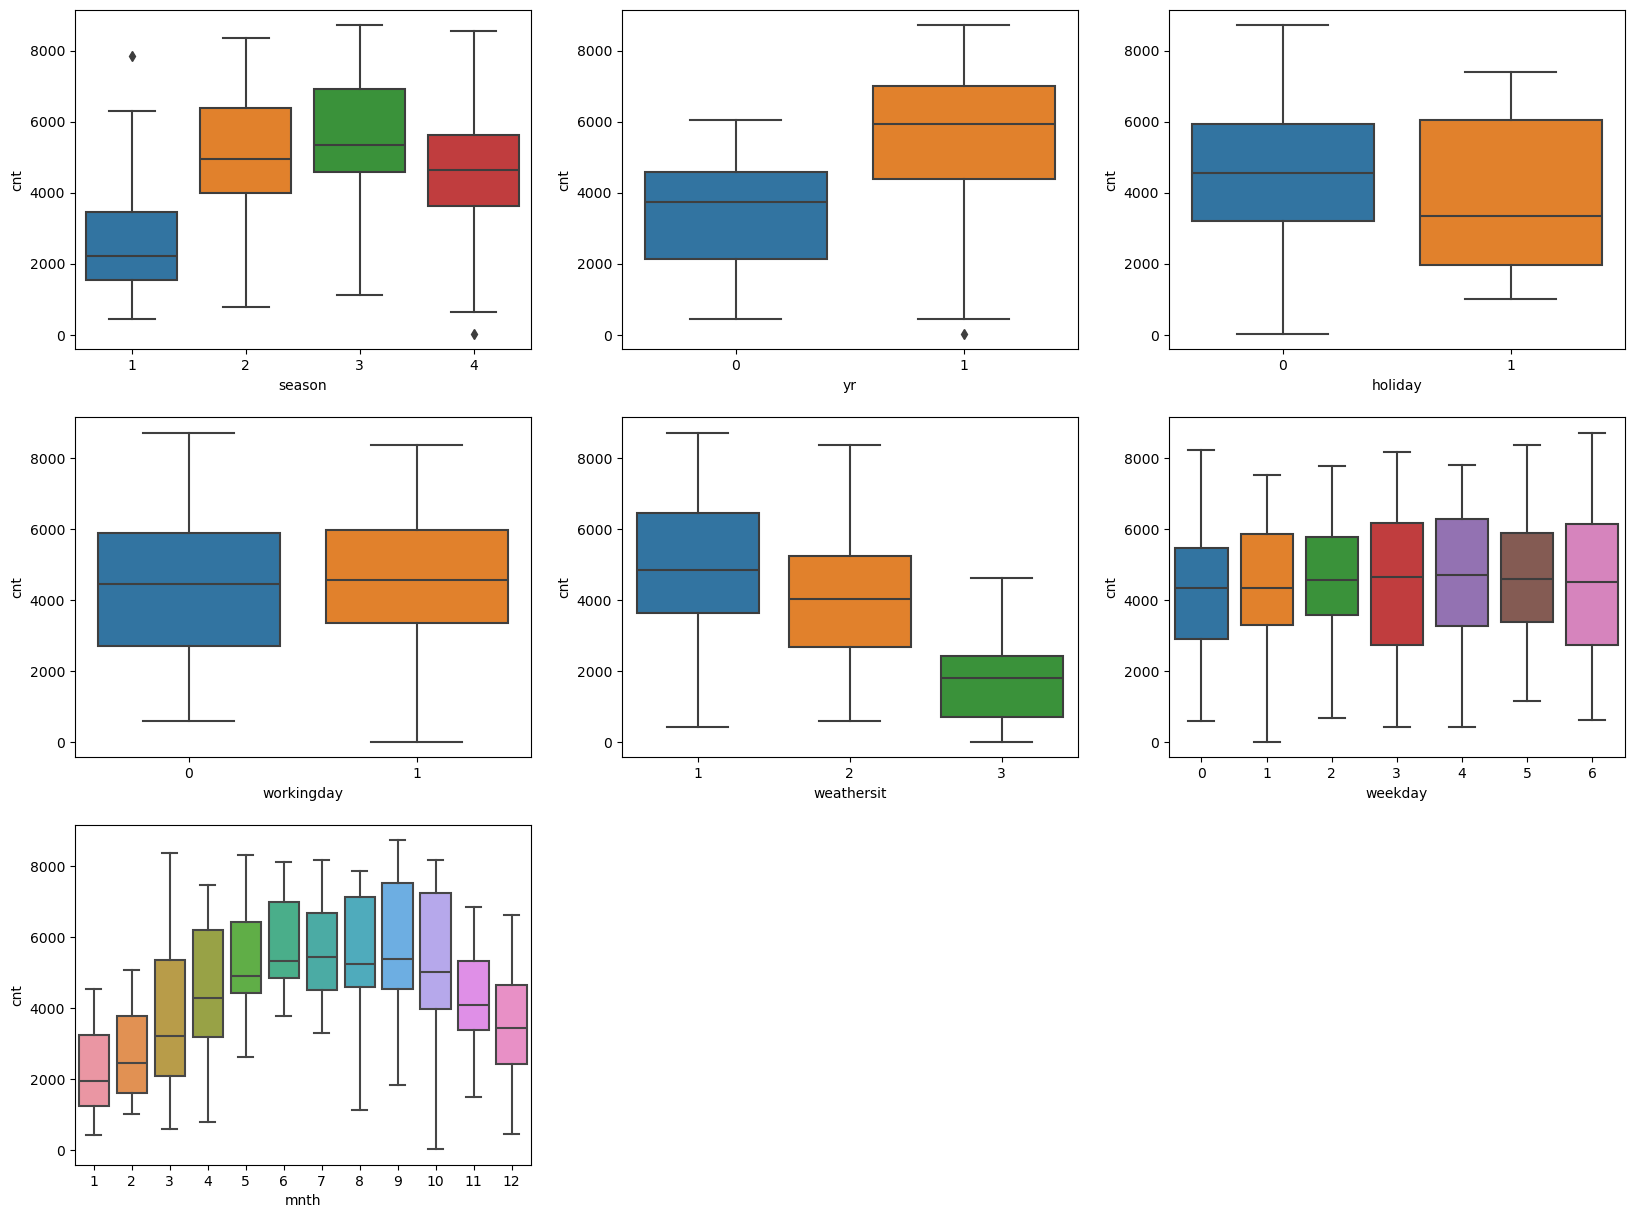

In [47]:
#Visualizing data

plt.figure(figsize = (20,15))

plt.subplot(3, 3, 1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

plt.subplot(3, 3, 4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

plt.subplot(3, 3, 5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

plt.subplot(3, 3, 6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

plt.subplot(3, 3, 7)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)

plt.show()

In [48]:
#getting count to understand the distinct values so that this can be converted to categorical string values accordingly
day.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [49]:
#getting count to understand the distinct values so that this can be converted to categorical string values accordingly
day.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

# Creating dummy variables to reduce repeatation of same feature value

In [50]:
wt = pd.get_dummies(day['weathersit']).astype(int)
wt.head(5)

1  2  3
0  0  1  0
1  0  1  0
2  1  0  0
3  1  0  0
4  1  0  0

In [51]:
#dropping redundant dummy variable
wt = pd.get_dummies(day['weathersit'], drop_first=True).astype(int)
wt.head()

2  3
0  1  0
1  1  0
2  0  0
3  0  0
4  0  0

In [52]:
#Concate dummy dataframe with the original one
day = pd.concat([day, wt], axis = 1)
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  2  3  
0   985  1  0  
1   801  1  0  
2  1349  0  0  
3  1562  0  0  
4  1600  0  0

In [53]:
#Renaming weathersit's column 2 and 3 to 'Mist + Cloudy' and 'Light Snow'
day.rename(columns = {3:'Light Snow', 2:'Mist + Cloudy'}, inplace = True)
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  Mist + Cloudy  Light Snow  
0   985              1           0  
1   801              1           0  
2  1349              0           0  
3  1562              0           0  
4  1600              0           0

In [54]:
ss = pd.get_dummies(day['season'], drop_first = True).astype(int)
ss.columns = ['summer', 'fall', 'winter']
ss.head(200)

summer  fall  winter
0         0     0       0
1         0     0       0
2         0     0       0
3         0     0       0
4         0     0       0
..      ...   ...     ...
195       0     1       0
196       0     1       0
197       0     1       0
198       0     1       0
199       0     1       0

[200 rows x 3 columns]

In [55]:
day = pd.concat([day, ss], axis = 1)
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp  ...      hum  windspeed  casual  registered   cnt  \
0           2  14.110847  ...  80.5833  10.749882     331         654   985   
1           2  14.902598  ...  69.6087  16.652113     131         670   801   
2           1   8.050924  ...  43.7273  16.636703     120        1229  1349   
3           1   8.200000  ...  59.0435  10.739832     108        1454  1562   
4           1   9.305237  ...  43.6957  12.522300      82        1518  1600   

   Mist + Cloudy  Light Snow  summer  fall  winter  
0              1           0       0     0       0  
1              1           0       0     0       0  
2              0           0       0     0       0  
3              0           0       0     0       0  
4              0           0       0     0       0  

[5 rows x 21 columns]

In [56]:
#dropping variables for which dummy variables are already created
day = day.drop(['season', 'weathersit'], axis = 1)
day.head()

instant      dteday  yr  mnth  holiday  weekday  workingday       temp  \
0        1  01-01-2018   0     1        0        6           0  14.110847   
1        2  02-01-2018   0     1        0        0           0  14.902598   
2        3  03-01-2018   0     1        0        1           1   8.050924   
3        4  04-01-2018   0     1        0        2           1   8.200000   
4        5  05-01-2018   0     1        0        3           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  Mist + Cloudy  \
0  18.18125  80.5833  10.749882     331         654   985              1   
1  17.68695  69.6087  16.652113     131         670   801              1   
2   9.47025  43.7273  16.636703     120        1229  1349              0   
3  10.60610  59.0435  10.739832     108        1454  1562              0   
4  11.46350  43.6957  12.522300      82        1518  1600              0   

   Light Snow  summer  fall  winter  
0           0       0     0       0  
1           0       0     0       0  
2           0       0     0       0  
3           0       0     0       0  
4           0       0     0       0

In [57]:
#Getting a derived column from the date column
# day['dteday'] = pd.to_datetime(day['dteday'], errors='coerce') ##Converted dteday into datetime first
# day['dayofyear'] = day['dteday'].dt.dayofyear

#dropping dteday as it has around 306 null values out of 510, also dropping instant as this is record index
day.drop(columns =['dteday', 'instant'], inplace =True)
day.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  Mist + Cloudy  Light Snow  summer  \
0  10.749882     331         654   985              1           0       0   
1  16.652113     131         670   801              1           0       0   
2  16.636703     120        1229  1349              0           0       0   
3  10.739832     108        1454  1562              0           0       0   
4  12.522300      82        1518  1600              0           0       0   

   fall  winter  
0     0       0  
1     0       0  
2     0       0  
3     0       0  
4     0       0

## Splitting into train and Test

In [58]:
#day.shape --> (730, 19)
df_train, df_test = train_test_split(day, train_size = 0.7, random_state = 100)
print(df_train.shape) ## (510, 19)
print(df_test.shape) ##(220, 19)

(510, 17)
(220, 17)


# Rescaling is needed 
###as we can see that a few values (registered, windspeed, cnt etc) are in 3 digits 
###(thousands, hundreds, tens) and coefficient values won't be much reliable as it can be either very high and low, 
###second reason is it is good for optimization

-> One way is to use normalization which is (x-xmin)/(xmax-xmin)
-> Another way is to use standardization (x-mu)/sigma

In [59]:
scaler = MinMaxScaler()
num_var = ['mnth','weekday','temp', 'atemp', 'hum','windspeed','casual','registered','cnt' ]
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

yr      mnth  holiday   weekday  workingday      temp     atemp  \
576   1  0.545455        0  0.333333           1  0.815169  0.766351   
426   1  0.181818        0  1.000000           0  0.442393  0.438975   
728   1  1.000000        0  0.000000           0  0.245101  0.200348   
482   1  0.272727        0  1.000000           0  0.395666  0.391735   
111   0  0.272727        0  0.833333           1  0.345824  0.318819   

          hum  windspeed    casual  registered       cnt  Mist + Cloudy  \
576  0.725633   0.264686  0.294422    0.899220  0.827658              0   
426  0.640189   0.255342  0.290765    0.446145  0.465255              1   
728  0.498067   0.663106  0.110332    0.203869  0.204096              0   
482  0.504508   0.188475  0.340750    0.444701  0.482973              1   
111  0.751824   0.380981  0.053337    0.214554  0.191095              1   

     Light Snow  summer  fall  winter  
576           0       0     1       0  
426           0       0     0       0  
728           0       0     0       0  
482           0       1     0       0  
111           0       1     0       0

In [60]:
#After scaling, I am confirming if scaling happened properly or not by looking at min, max
df_train.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.503743    0.025490    0.498366    0.676471    0.537440   
std      0.500429    0.315038    0.157763    0.336182    0.468282    0.225858   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.181818    0.000000    0.166667    0.000000    0.339853   
50%      1.000000    0.545455    0.000000    0.500000    1.000000    0.542596   
75%      1.000000    0.818182    0.000000    0.833333    1.000000    0.735215   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            atemp         hum   windspeed      casual  registered         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.513156    0.650480    0.320883    0.254689    0.523781    0.513499   
std      0.212410    0.145846    0.169803    0.206015    0.227896    0.224421   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.332086    0.538643    0.199179    0.094179    0.353487    0.356420   
50%      0.529718    0.653714    0.296763    0.212740    0.525123    0.518638   
75%      0.688457    0.754830    0.414447    0.327415    0.696073    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy  Light Snow      summer        fall      winter  
count     510.000000  510.000000  510.000000  510.000000  510.000000  
mean        0.345098    0.029412    0.247059    0.262745    0.247059  
std         0.475867    0.169124    0.431725    0.440557    0.431725  
min         0.000000    0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    0.000000    1.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000    1.000000

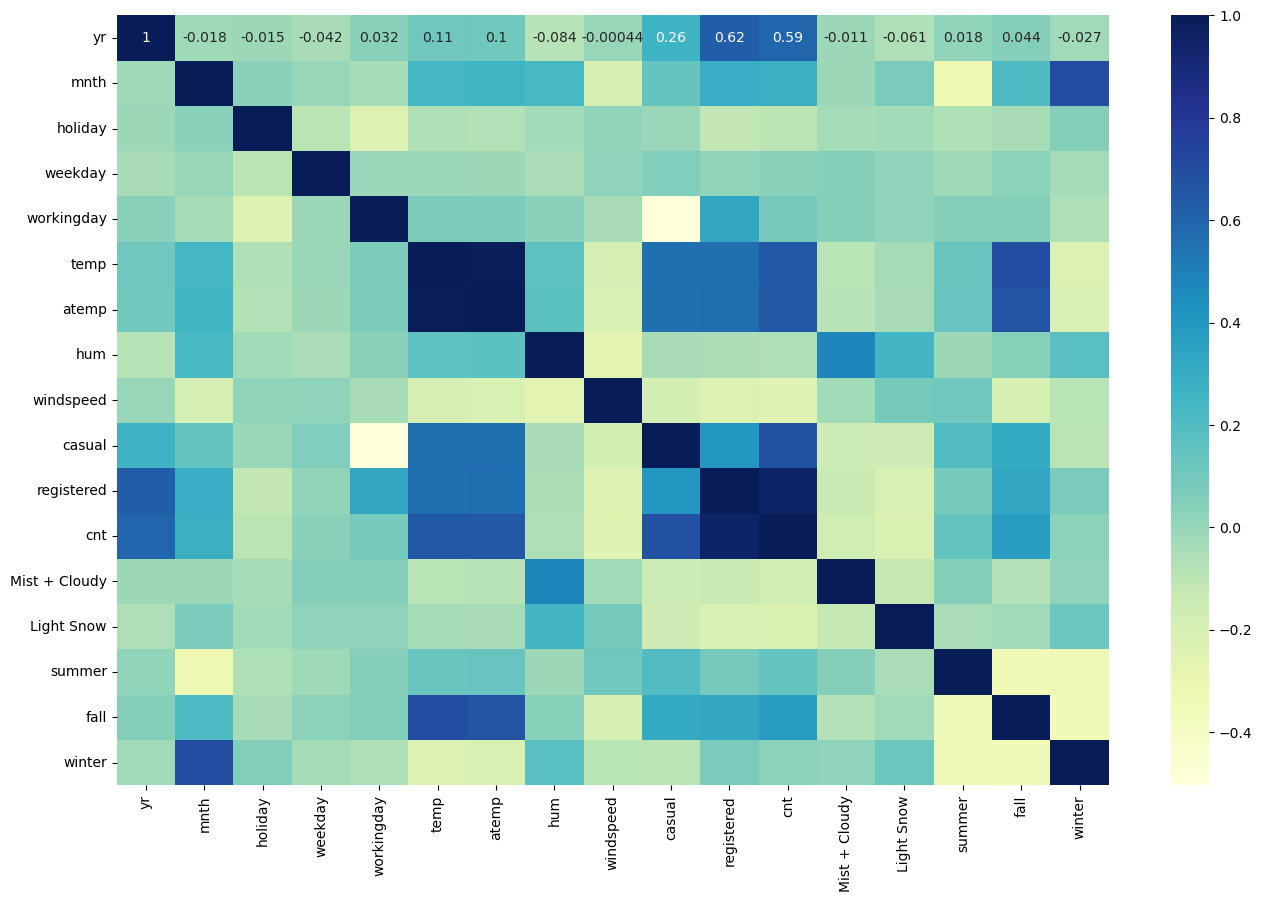

In [61]:
#ploting heatmap to understand corelation between all features
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

In [63]:
#There are two techniques of model building - forward selection technique amd backward selection technique, I will go will backward selection technique

day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Mist + Cloudy',
       'Light Snow', 'summer', 'fall', 'winter'],
      dtype='object')

In [64]:
#build model with all variables

X_train_sm = sm.add_constant(X_train)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.039e+29
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:01:40   Log-Likelihood:                 16754.
No. Observations:                 510   AIC:                        -3.347e+04
Df Residuals:                     493   BIC:                        -3.340e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.441e-16   4.44e-16      1.001      0.317   -4.27e-16    1.32e-15
yr             6.939e-17   2.04e-16      0.340      0.734   -3.31e-16     4.7e-16
mnth          -1.041e-17   3.71e-16     -0.028      0.978   -7.39e-16    7.18e-16
holiday        5.343e-16   3.95e-16      1.354      0.176   -2.41e-16    1.31e-15
weekday       -1.527e-16   1.81e-16     -0.842      0.400   -5.09e-16    2.03e-16
workingday     4.866e-16   2.34e-16      2.076      0.038    2.61e-17    9.47e-16
temp           9.992e-16   2.01e-15      0.496      0.620   -2.96e-15    4.96e-15
atemp         -1.554e-15   2.04e-15     -0.764      0.445   -5.55e-15    2.44e-15
hum             2.22e-16   5.64e-16      0.393      0.694   -8.87e-16    1.33e-15
windspeed     -2.776e-17   4.04e-16     -0.069      0.945   -8.22e-16    7.67e-16
casual            0.3775   5.73e-16   6.58e+14      0.000       0.377       0.377
registered        0.7968   6.83e-16   1.17e+15      0.000       0.797       0.797
Mist + Cloudy  9.021e-17    1.6e-16      0.563      0.574   -2.25e-16    4.05e-16
Light Snow     1.145e-16   4.25e-16      0.270      0.788    -7.2e-16    9.49e-16
summer           3.4e-16   2.36e-16      1.441      0.150   -1.24e-16    8.04e-16
fall           1.735e-16   3.34e-16      0.519      0.604   -4.83e-16     8.3e-16
winter         3.001e-16   3.34e-16      0.898      0.370   -3.57e-16    9.57e-16
==============================================================================
Omnibus:                       16.973   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.162
Skew:                           0.457   Prob(JB):                     0.000114
Kurtosis:                       2.863   Cond. No.                         97.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#VIF = 1/1-r**2

vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

Features     VIF
5            temp  394.46
6           atemp  365.84
10     registered   43.31
7             hum   18.27
1            mnth   13.90
4      workingday   10.18
9          casual    9.62
14           fall    8.38
15         winter    7.89
0              yr    6.07
8       windspeed    4.11
13         summer    3.91
3         weekday    3.23
11  Mist + Cloudy    2.38
12     Light Snow    1.48
2         holiday    1.12

In [79]:
#dropping variables with high p value, vif
X = X_train.drop(['temp', 'atemp','mnth', 'hum','windspeed','Mist + Cloudy','Light Snow','fall','winter'], axis = 1)
X.head()

yr  holiday   weekday  workingday    casual  registered  summer
576   1        0  0.333333           1  0.294422    0.899220       0
426   1        0  1.000000           0  0.290765    0.446145       0
728   1        0  0.000000           0  0.110332    0.203869       0
482   1        0  1.000000           0  0.340750    0.444701       1
111   0        0  0.833333           1  0.053337    0.214554       1

In [80]:
X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.076e+30
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:26:07   Log-Likelihood:                 16750.
No. Observations:                 510   AIC:                        -3.348e+04
Df Residuals:                     502   BIC:                        -3.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.576e-16   1.98e-16      4.841      0.000    5.69e-16    1.35e-15
yr          1.804e-16   1.59e-16      1.133      0.258   -1.32e-16    4.93e-16
holiday     4.372e-16   3.92e-16      1.117      0.265   -3.32e-16    1.21e-15
weekday      2.29e-16   1.77e-16      1.296      0.196   -1.18e-16    5.76e-16
workingday   4.25e-16    2.2e-16      1.931      0.054   -7.33e-18    8.57e-16
casual         0.3775      5e-16   7.54e+14      0.000       0.377       0.377
registered     0.7968   4.93e-16   1.62e+15      0.000       0.797       0.797
summer              0   1.43e-16          0      1.000    -2.8e-16     2.8e-16
==============================================================================
Omnibus:                       35.411   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.011
Skew:                           0.686   Prob(JB):                     1.24e-09
Kurtosis:                       3.219   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#rebuilding model again after dropping 3 features from above
vif = pd.DataFrame()
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

Features    VIF
5  registered  22.70
3  workingday   7.65
4      casual   6.70
0          yr   3.72
2     weekday   2.65
6      summer   1.45
1     holiday   1.04

In [84]:
#dropping registered, along with others mentioned above as it has high multicollinearity 
X = X_train.drop(['registered', 'temp', 'atemp','mnth', 'hum','windspeed','Mist + Cloudy','Light Snow','fall','winter'], axis = 1)
X.head()

yr  holiday   weekday  workingday    casual  summer
576   1        0  0.333333           1  0.294422       0
426   1        0  1.000000           0  0.290765       0
728   1        0  0.000000           0  0.110332       0
482   1        0  1.000000           0  0.340750       1
111   0        0  0.833333           1  0.053337       1

In [85]:
X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     382.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.07e-184
Time:                        22:32:08   Log-Likelihood:                 476.47
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     503   BIC:                            -909.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.014      2.190      0.029       0.003       0.059
yr             0.1599      0.009     17.774      0.000       0.142       0.178
holiday        0.0505      0.028      1.794      0.073      -0.005       0.106
weekday        0.0032      0.013      0.251      0.802      -0.022       0.028
workingday     0.2496      0.011     22.096      0.000       0.227       0.272
casual         0.9286      0.026     35.166      0.000       0.877       0.980
summer        -0.0284      0.010     -2.782      0.006      -0.048      -0.008
==============================================================================
Omnibus:                       37.465   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.256
Skew:                          -0.602   Prob(JB):                     3.32e-11
Kurtosis:                       3.905   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

Features   VIF
4      casual  2.66
2     weekday  2.64
3  workingday  2.35
0          yr  2.27
5      summer  1.43
1     holiday  1.02

In [87]:
#I will be dropping weekday now as it has high p value 
X = X_train.drop(['registered', 'temp', 'atemp','mnth', 'hum','windspeed','Mist + Cloudy','Light Snow','fall','winter', 'weekday'], axis = 1)
X.head()

yr  holiday  workingday    casual  summer
576   1        0           1  0.294422       0
426   1        0           0  0.290765       0
728   1        0           0  0.110332       0
482   1        0           0  0.340750       1
111   0        0           1  0.053337       1

In [88]:
X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     459.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.69e-185
Time:                        22:36:01   Log-Likelihood:                 476.44
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     504   BIC:                            -915.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0326      0.013      2.558      0.011       0.008       0.058
yr             0.1597      0.009     17.811      0.000       0.142       0.177
holiday        0.0498      0.028      1.780      0.076      -0.005       0.105
workingday     0.2497      0.011     22.124      0.000       0.228       0.272
casual         0.9291      0.026     35.311      0.000       0.877       0.981
summer        -0.0285      0.010     -2.797      0.005      -0.049      -0.008
==============================================================================
Omnibus:                       37.832   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.021
Skew:                          -0.604   Prob(JB):                     2.27e-11
Kurtosis:                       3.921   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

Features   VIF
0          yr  2.26
3      casual  2.09
2  workingday  1.71
4      summer  1.43
1     holiday  1.02

In [90]:
#I will be dropping holiday now as it has high p value 
X = X_train.drop(['registered', 'temp', 'atemp','mnth', 'hum','windspeed','Mist + Cloudy','Light Snow','fall','winter', 'weekday', 'holiday'], axis = 1)
X.head()

yr  workingday    casual  summer
576   1           1  0.294422       0
426   1           0  0.290765       0
728   1           0  0.110332       0
482   1           0  0.340750       1
111   0           1  0.053337       1

In [91]:
X_train_sm = sm.add_constant(X)

#create a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     571.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.02e-186
Time:                        22:39:49   Log-Likelihood:                 474.84
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     505   BIC:                            -918.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0391      0.012      3.188      0.002       0.015       0.063
yr             0.1604      0.009     17.862      0.000       0.143       0.178
workingday     0.2442      0.011     22.439      0.000       0.223       0.266
casual         0.9222      0.026     35.359      0.000       0.871       0.973
summer        -0.0287      0.010     -2.817      0.005      -0.049      -0.009
==============================================================================
Omnibus:                       36.005   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.327
Skew:                          -0.574   Prob(JB):                     5.29e-11
Kurtosis:                       3.952   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF', ascending = False)

vif

Features   VIF
0          yr  2.26
2      casual  2.07
1  workingday  1.70
3      summer  1.43

In [93]:
X.columns

Index(['yr', 'workingday', 'casual', 'summer'], dtype='object')

# Residual Analysis 

In [94]:
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

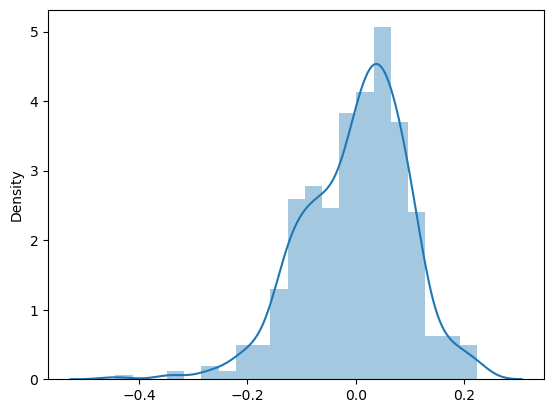

In [95]:
res = y_train - y_train_pred
sns.distplot(res)

# Prediction and Evaluation on the test set

In [96]:
# scaler = MinMaxScaler()
num_var = ['mnth','weekday','temp', 'atemp', 'hum','windspeed','casual','registered','cnt' ]
df_test[num_var] = scaler.transform(df_test[num_var])

df_test.head()

yr      mnth  holiday   weekday  workingday      temp     atemp  \
184   0  0.545455        1  0.166667           0  0.831783  0.769660   
535   1  0.454545        0  0.500000           1  0.901354  0.842587   
299   0  0.818182        0  0.666667           1  0.511964  0.496145   
221   0  0.636364        0  0.500000           1  0.881625  0.795343   
152   0  0.454545        0  0.666667           1  0.817246  0.741471   

          hum  windspeed    casual  registered       cnt  Mist + Cloudy  \
184  0.657364   0.084219  0.933557    0.427086  0.692706              1   
535  0.610133   0.153728  0.265163    0.767976  0.712034              0   
299  0.837699   0.334206  0.072539    0.346376  0.303382              1   
221  0.437098   0.339570  0.268820    0.559630  0.547400              0   
152  0.314298   0.537414  0.223712    0.608143  0.569029              0   

     Light Snow  summer  fall  winter  
184           0       0     1       0  
535           0       1     0       0  
299           0       0     0       1  
221           0       0     1       0  
152           0       1     0       0

In [97]:
df_test.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.499174    0.036364    0.502273    0.700000    0.558718   
std      0.500809    0.311120    0.187620    0.330843    0.459303    0.233187   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.046591   
25%      0.000000    0.272727    0.000000    0.166667    0.000000    0.355429   
50%      0.000000    0.454545    0.000000    0.500000    1.000000    0.558172   
75%      1.000000    0.727273    0.000000    0.833333    1.000000    0.755981   
max      1.000000    1.000000    1.000000    1.000000    1.000000    0.984424   

            atemp         hum   windspeed      casual  registered         cnt  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.532847    0.638221    0.313293    0.266436    0.529076    0.522154   
std      0.217401    0.148694    0.159584    0.216751    0.219300    0.219163   
min      0.025950    0.261915   -0.042808    0.002133    0.059486    0.048205   
25%      0.344870    0.529197    0.198843    0.102484    0.359190    0.378595   
50%      0.544652    0.625590    0.300126    0.225236    0.527577    0.524678   
75%      0.713308    0.743798    0.402718    0.361780    0.667088    0.677750   
max      0.980934    1.002146    0.807474    1.038708    0.985273    0.963300   

       Mist + Cloudy  Light Snow      summer        fall      winter  
count     220.000000  220.000000  220.000000  220.000000  220.000000  
mean        0.318182    0.027273    0.263636    0.245455    0.236364  
std         0.466833    0.163248    0.441609    0.431338    0.425817  
min         0.000000    0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    1.000000    0.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000    1.000000

In [98]:
y_test = df_test.pop('cnt')
X_test = df_test

In [100]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr      mnth  holiday   weekday  workingday      temp     atemp  \
184    1.0   0  0.545455        1  0.166667           0  0.831783  0.769660   
535    1.0   1  0.454545        0  0.500000           1  0.901354  0.842587   
299    1.0   0  0.818182        0  0.666667           1  0.511964  0.496145   
221    1.0   0  0.636364        0  0.500000           1  0.881625  0.795343   
152    1.0   0  0.454545        0  0.666667           1  0.817246  0.741471   

          hum  windspeed    casual  registered  Mist + Cloudy  Light Snow  \
184  0.657364   0.084219  0.933557    0.427086              1           0   
535  0.610133   0.153728  0.265163    0.767976              0           0   
299  0.837699   0.334206  0.072539    0.346376              1           0   
221  0.437098   0.339570  0.268820    0.559630              0           0   
152  0.314298   0.537414  0.223712    0.608143              0           0   

     summer  fall  winter  
184       0     1       0  
535       1     0       0  
299       0     0       1  
221       0     1       0  
152       1     0       0

In [101]:
X_test_sm = X_test_sm.drop(['registered', 'temp', 'atemp','mnth', 'hum','windspeed','Mist + Cloudy','Light Snow','fall','winter', 'weekday', 'holiday'], axis = 1)

In [102]:
y_test_pred = lr_model.predict(X_test_sm)

In [103]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7638725164064869